In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import yfinance as yf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, we will build a linear regression model to predict stock closing prices. We will use the scikit-learn ML toolkit to build the linear regression model.

In [2]:
COMPANY_NAME = 'Amazon.com, Inc'
STOCK_TICKER = 'AMZN'
START_DATE = '2011-01-01'
END_DATE = '2021-05-31'

**Load the stock closing prices data**

In [69]:
stock_df = yf.download(STOCK_TICKER, start=START_DATE, end=END_DATE)
stock_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,181.369995,186.000000,181.210007,184.220001,184.220001,5331400
2011-01-04,186.149994,187.699997,183.779999,185.009995,185.009995,5031800
2011-01-05,184.100006,187.449997,184.070007,187.419998,187.419998,3418800
2011-01-06,186.500000,187.410004,185.250000,185.860001,185.860001,3179700
2011-01-07,187.880005,188.449997,183.740005,185.490005,185.490005,5221700


### Data Preparation

**Returns**

In [4]:
# Create a series using "Close" price percentage returns
stock_df['Return'] = stock_df['Close'].pct_change() * 100
stock_df = stock_df.replace(-np.inf, np.nan).dropna()
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2011-01-04,186.149994,187.699997,183.779999,185.009995,185.009995,5031800,0.428831
2011-01-05,184.100006,187.449997,184.070007,187.419998,187.419998,3418800,1.302634
2011-01-06,186.500000,187.410004,185.250000,185.860001,185.860001,3179700,-0.832354
2011-01-07,187.880005,188.449997,183.740005,185.490005,185.490005,5221700,-0.199072
2011-01-10,185.039993,185.289993,182.509995,184.679993,184.679993,3375900,-0.436688


**Lagged Returns**

In [5]:
# Create a lagged return using the shift function
stock_df['Lagged_Return'] = stock_df['Return'].shift()
stock_df = stock_df.replace(-np.inf, np.nan).dropna()
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2011-01-05,184.100006,187.449997,184.070007,187.419998,187.419998,3418800,1.302634,0.428831
2011-01-06,186.500000,187.410004,185.250000,185.860001,185.860001,3179700,-0.832354,1.302634
2011-01-07,187.880005,188.449997,183.740005,185.490005,185.490005,5221700,-0.199072,-0.832354
2011-01-10,185.039993,185.289993,182.509995,184.679993,184.679993,3375900,-0.436688,-0.199072
2011-01-11,185.419998,186.000000,183.210007,184.339996,184.339996,2814200,-0.184100,-0.436688


**Train Test Split**

In [54]:
split_data = int(len(stock_df)*0.8)

train = stock_df[:split_data]
test = stock_df[split_data:]

In [55]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train['Lagged_Return'].to_frame()
X_test = test['Lagged_Return'].to_frame()
y_train = train['Return']
y_test = test['Return']

In [56]:
X_train.head()

,Lagged_Return
Date,
2011-01-05,0.428831
2011-01-06,1.302634
2011-01-07,-0.832354
2011-01-10,-0.199072
2011-01-11,-0.436688


In [57]:
X_test.head()

,Lagged_Return
Date,
2019-05-02,-0.778606
2019-05-03,-0.559768
2019-05-06,3.242812
2019-05-07,-0.606887
2019-05-08,-1.514960


In [58]:
y_test.head()

Date
2019-05-02   -0.559768
2019-05-03    3.242812
2019-05-06   -0.606887
2019-05-07   -1.514960
2019-05-08   -0.168141
Name: Return, dtype: float64

### Linear Regression Model

In [59]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

**Make predictions using the Testing Data**

In [60]:
# Make a prediction of "y" values using just the test dataset
predictions = lr_model.predict(X_test)

In [61]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results['Predicted Return'] = predictions
Results

,Return,Predicted Return
Date,,
2019-05-02,-0.559768,0.137202
2019-05-03,3.242812,0.135756
2019-05-06,-0.606887,0.110622
2019-05-07,-1.514960,0.136067
2019-05-08,-0.168141,0.142070
...,...,...
2021-05-24,1.308425,0.141133
2021-05-25,0.433285,0.123408
2021-05-26,0.187474,0.129192


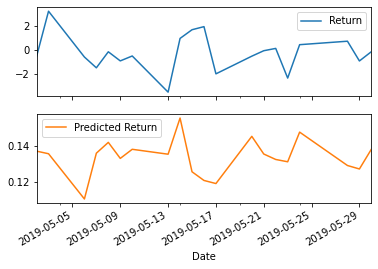

In [62]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)
plt.margins(x=0)

### Out-of-Sample Performance
Evaluate the model using "out-of-sample" data (X_test and y_test)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(
    Results['Return'],
    Results['Predicted Return']
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")


Out-of-Sample Root Mean Squared Error (RMSE): 1.9589223948846266


### In-Sample Performance
Evaluate the model using in-sample data (X_train and y_train)

In [64]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results['In-Sample Predictions'] = lr_model.predict(X_train)
in_sample_results.head()

,Return,In-Sample Predictions
Date,,
2011-01-05,1.302634,0.129222
2011-01-06,-0.832354,0.123446
2011-01-07,-0.199072,0.137558
2011-01-10,-0.436688,0.133372
2011-01-11,-0.184100,0.134942


In [65]:
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results['Return'],
    in_sample_results['In-Sample Predictions']
    )

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 1.9825619095806992
